# Phase 3 Data Science Training Notebook

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Exploratory Data Analysis

In [27]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [32]:
# Process the files into dataset.
train_batch_1 = unpickle('./cifar-10-batches-py/data_batch_1')
train_batch_2 = unpickle('./cifar-10-batches-py/data_batch_2')
train_batch_3 = unpickle('./cifar-10-batches-py/data_batch_3')
train_batch_4 = unpickle('./cifar-10-batches-py/data_batch_4')
train_batch_5 = unpickle('./cifar-10-batches-py/data_batch_5')
test_batch = unpickle('./cifar-10-batches-py/test_batch')

In [36]:
test_batch[b'data'].shape

(10000, 3072)

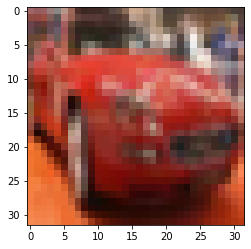

In [40]:
train_batch_1_images = train_batch_1[b'data']
train_batch_1_images = train_batch_1_images.reshape(10000, 3, 32, 32)
train_batch_1_images =  train_batch_1_images.transpose(0, 2, 3, 1)

plt.imshow(train_batch_1_images[5])

In [66]:
list_size = 10000

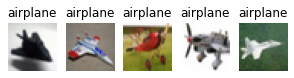

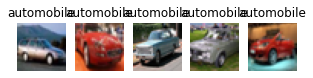

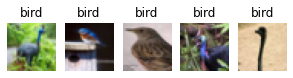

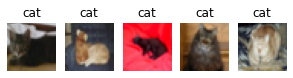

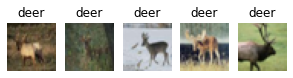

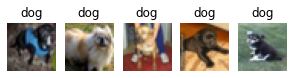

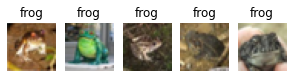

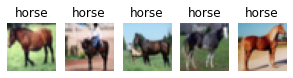

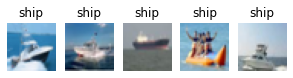

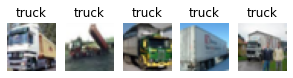

In [48]:
batch_1_labels = train_batch_1[b'labels']

label_names = ["airplane", "automobile", "bird", "cat", 
"deer", "dog", "frog", "horse", "ship", "truck"]
label_indices = [ [], [] , [], [], [], [], [], [], [], []]

for i in range(10000):
    label_indices[batch_1_labels[i]].append(i)


for i in range(10):
    plt.figure(figsize=(5, 10))
    for j in range(5):
        plt.subplot(1,5,j+1)
        plt.imshow(train_batch_1_images[label_indices[i][j]])
        plt.title(label_names[i])
        plt.axis('off')
    plt.show

# Data Processing

In [64]:
all_imgs = np.concatenate([train_batch_1[b'data'],train_batch_2[b'data'],train_batch_3[b'data'],train_batch_4[b'data'],train_batch_5[b'data']])
all_labels = np.concatenate([train_batch_1[b'labels'],train_batch_2[b'labels'],train_batch_3[b'labels'],train_batch_4[b'labels'],train_batch_5[b'labels']])
training_imgs = test_batch[b'data']
training_labels = test_batch[b'labels']

all_imgs = all_imgs.reshape(10000 * 5, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")
training_images = training_imgs.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")


all_imgs.shape

(50000, 32, 32, 3)

In [68]:
# get every label indice in megaset and trainingset
megaset_indices =   [[], [] , [], [], [], [], [], [], [], []]
training_indices = [[], [] , [], [], [], [], [], [], [], []]

for i in range(5 * list_size):
    megaset_indices[all_labels[i]].append(i)

# just check if indices are being added
#print(megaset_indices[0])

for i in range(list_size):
    training_indices[training_labels[i]].append(i)

ten_k_set = [[],[]]
two_k_set = [[],[]]

for i in range(5000):
    ten_k_set[0].append(all_imgs[megaset_indices[7][i]])
    ten_k_set[1].append(5)
for i in range(1000):
    two_k_set[0].append(training_images[training_indices[7][i]])
    two_k_set[1].append(5)


for i in range(5):
    for j in range(556):
            ten_k_set[0].append(all_imgs[megaset_indices[i][j]])
            ten_k_set[1].append(i)

for i in range(6,10):
    for j in range(555):
            ten_k_set[0].append(all_imgs[megaset_indices[i][j]])
            ten_k_set[1].append(i)



for j in range(112):
        two_k_set[0].append(training_images[training_indices[0][j]])
        two_k_set[1].append(0)

for i in range(1,5):
    for j in range(111):
            two_k_set[0].append(training_images[training_indices[i][j]])
            two_k_set[1].append(i)

for i in range(6,10):
    for j in range(111):
            two_k_set[0].append(training_images[training_indices[i][j]])
            two_k_set[1].append(i)


# print(two_k_set[0].shape)
# print(len(two_k_set[1]))
# Testprint for index
#print(ten_k_set[1][5000])

In [20]:
train_x = np.random.randint(0,255,size=(10000,3,32,32))
train_y = np.random.randint(0,255,size=(10000))

test_x = np.random.randint(0,255,size=(1000,3,32,32))
test_y = np.random.randint(0,255,size=(1000))

In [69]:
training_df = pd.DataFrame()
testing_df = pd.DataFrame()

training_df['images'] = ten_k_set[0]
training_df['labels'] = ten_k_set[1]
testing_df['images'] = two_k_set[0]
testing_df['labels'] = two_k_set[1]

# change all dog labels to 1, and all non-dog labels to 0
training_df['labels'] = training_df['labels'].apply(lambda x:1 if x==5 else 0)
testing_df['labels'] = testing_df['labels'].apply(lambda x:1 if x==5 else 0)


In [70]:
train_x = np.array(pd.Series.to_list(training_df['images']))
train_y = training_df['labels']
test_x = np.array(pd.Series.to_list(testing_df['images']))
test_y = testing_df['labels']

In [72]:
train_x = np.array(pd.Series.to_list(training_df['images']))
train_y = training_df['labels']
test_x = np.array(pd.Series.to_list(testing_df['images']))
test_y = testing_df['labels']

# Data Modelling

In [73]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [74]:
def generateModel(hp=None):
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.


    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))


    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) 



    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [76]:
model = generateModel()

log_dir = "output/logs/"

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(train_x,train_y,
    validation_data=(test_x, test_y),
    epochs=20,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/20
10/10 [==============================] - 4s 409ms/step - loss: 0.7345 - accuracy: 0.5505 - val_loss: 0.6490 - val_accuracy: 0.6100
Epoch 2/20
10/10 [==============================] - 3s 342ms/step - loss: 0.6231 - accuracy: 0.6427 - val_loss: 0.5992 - val_accuracy: 0.6755
Epoch 3/20
10/10 [==============================] - 3s 345ms/step - loss: 0.5603 - accuracy: 0.7244 - val_loss: 0.5495 - val_accuracy: 0.7285
Epoch 4/20
10/10 [==============================] - 4s 360ms/step - loss: 0.5186 - accuracy: 0.7489 - val_loss: 0.5072 - val_accuracy: 0.7680
Epoch 5/20
10/10 [==============================] - 4s 385ms/step - loss: 0.4981 - accuracy: 0.7694 - val_loss: 0.4910 - val_accuracy: 0.7795
Epoch 6/20
10/10 [==============================] - 4s 381ms/step - loss: 0.4759 - accuracy: 0.7823 - val_loss: 0.4805 - val_accuracy: 0.7815
Epoch 7/20
10/10 [==============================] - 4s 408ms/step - loss: 0.4612 - accuracy: 0.7955 - val_loss: 0.4690 - val_accuracy: 0.7925
Epoch 

In [78]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 4ms/step - loss: 0.4309 - accuracy: 0.8070


[0.43086332082748413, 0.8069999814033508]

In [79]:
model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_26 (Dense)            (None, 64)                921664    
                                                                 
 Output_Probability (Dense)  (None, 1)                 65        
                                           

In [80]:
model.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets


INFO:tensorflow:Assets written to: output/my_model\assets
